# Objective : 

NBA has the highest home-court win percentage of the four major American sports leagues, with a historical overall winning percentage of 60%. 

We want to find out if any such thing as a home advantage actually exists. If it does, we would like to find out the factors behind it, and its relevance. 


Why analyze stats for the Regular Season and not Post Season/Playoffs?

During the regular season, teams have very little preparation time for a game. They generally arrive at the home teams stadium the night before. So, the effects of scouting and advanced tactics are much less expressed during the regular season. Moreover, teams in the NBA are notorious for not playing their best players/ optimal intensity during the playoffs. So, teams are a bit more balanced and elite teams have a greater chance of losing. This implies that if any such thing as home advantage exists, it will be much more pronounced during the regular season. 


In [62]:
# imports
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_ind

We will be using 2 dataframes for our home advantage analysis:

# 1. master_df 

contains the following features separated by home and away for all seasons from 2002-2020.

GP:Games Played | GS:Games Started | MIN:Minutes Per Game | PTS:Points Per Game | OR:Offensive Rebounds Per Game

DR:Defensive Rebounds Per Game | REB:Rebounds Per Game | AST:Assists Per Game | STL:Steals Per Game 

BLK:Blocks Per Game | TO:Turnovers Per Game | PF:Fouls Per Game | AST/TO:Assist To Turnover Ratio


# 2. shots_df 

contains the following features separated by home and away for all seasons from 2002-2020.

FGM:Average Field Goals Made | FGA:Average Field Goals Attempted | FG%:Field Goal Percentage

3PM:Average 3-Point Field Goals Made | 3PA:Average 3-Point Field Goals Attempted | 3P%:3-Point Field Goal Percentage

FTM:Average Free Throws Made | FTA:Average Free Throws Attempted | FT%:Free Throw Percentage 

2PM:2-Point Field Goals Made / game | 2PA:2-Point Field Goals Attempted per Game | 2P%:2-Point Field Goal Percentage

SC-EFF:Scoring Efficiency | SH-EFF:Shooting Efficiency

# Load the Datasets

In [63]:
# type = 33 refers to home games, 34 refers to away games
master_df = pd.read_csv('home_away.csv')
master_df.head()

,PNAME,POS,TEAM,YEAR,TYPE,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,PER
0,Jamal Mashburn,SF,no,2003,33,41,40,40.4,22.4,0.7,5.6,6.3,5.7,1.0,0.3,2.9,2.3,2.0,0
1,David Wesley,SG,no,2003,33,36,36,38.1,17.6,0.7,1.8,2.5,4.0,1.6,0.2,1.8,2.5,2.2,0
2,Baron Davis,PG,no,2003,33,25,25,37.0,16.9,1.0,2.7,3.7,7.4,2.0,0.6,2.8,3.0,2.7,0
3,Jamaal Magloire,C,no,2003,33,41,41,31.5,11.5,3.7,6.3,10.0,1.5,0.7,1.6,1.9,3.2,0.8,0
4,P.J. Brown,PF,no,2003,33,39,39,32.9,11.3,2.7,5.7,8.4,1.9,0.9,1.0,1.3,2.6,1.4,0


In [64]:
# type = 33 refers to home games, 34 refers to away games
shots_df = pd.read_csv('shots_home_away_stats.csv')
shots_df.head()

,PNAME,POS,TEAM,YEAR,TYPE,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF
0,Shareef Abdur-Rahim,PF,atl,2002,33,8.1,17.1,47.4,0.4,1.1,39.0,5.2,6.4,81.6,7.7,16.0,48.0,1.279,0.49
1,Jason Terry,G,atl,2002,33,7.3,16.3,44.6,2.3,5.7,39.9,3.9,4.7,82.0,5.0,10.6,47.1,1.269,0.52
2,Theo Ratliff,C,atl,2002,33,5.0,8.0,62.5,0.0,0.0,0.0,2.0,6.0,33.3,5.0,8.0,62.5,1.500,0.63
3,Toni Kukoc,SF,atl,2002,33,4.1,9.1,45.3,1.1,3.0,36.7,2.0,2.7,76.3,3.0,6.1,49.5,1.248,0.51
4,Dion Glover,SG,atl,2002,33,4.5,9.8,46.3,0.8,2.3,36.8,1.3,1.6,78.0,3.7,7.5,49.2,1.143,0.51


# Clean the Datasets

In [65]:
master_df.describe()

,YEAR,TYPE,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,PER
count,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000,19289.00000,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000,19289.0,19289.0
mean,2011.495982,33.499093,23.632174,11.450308,20.059443,8.08045,0.918715,2.592742,3.508761,1.786002,0.629307,0.402167,1.151874,1.801659,inf,0.0
std,5.472670,0.500012,13.132732,13.993289,10.014791,5.97299,0.835390,1.821683,2.502688,1.786815,0.464474,0.481532,0.813595,0.849869,NaN,0.0
min,2002.000000,33.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,2007.000000,33.000000,12.000000,0.000000,11.900000,3.50000,0.300000,1.300000,1.700000,0.600000,0.300000,0.100000,0.600000,1.200000,0.8,0.0
50%,2012.000000,33.000000,26.000000,4.000000,19.600000,6.70000,0.700000,2.200000,3.000000,1.200000,0.500000,0.300000,1.000000,1.800000,1.3,0.0
75%,2016.000000,34.000000,36.000000,21.000000,28.300000,11.40000,1.300000,3.400000,4.700000,2.400000,0.900000,0.500000,1.600000,2.400000,2.0,0.0
max,2020.000000,34.000000,41.000000,41.000000,48.000000,37.90000,7.000000,12.100000,18.000000,12.700000,3.200000,6.000000,6.300000,6.000000,inf,0.0


Observations : 
1. PER has all 0 values.
2. None of the columns have missing values. 
3. AST/TO has INF mean and NAN std, such values should be removed. 
4. There are observations where the player has played 0 minutes in a season, we should remove that.

So, we clean the data in the following code block

In [66]:
master_df = master_df.drop(columns=['PER']) # drop the PER column
# master_df[master_df['MIN']==0.0] # 16 players have played 0 minutes 
master_df = master_df[master_df['MIN'] != 0.0] # remove the players who havent played any minutes
master_df = master_df[master_df['AST/TO'] != np.inf] # remove the observations where AST/TO is INF
master_df.describe()

,YEAR,TYPE,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO
count,18847.000000,18847.000000,18847.000000,18847.000000,18847.000000,18847.000000,18847.000000,18847.000000,18847.000000,18847.000000,18847.000000,18847.000000,18847.000000,18847.000000,18847.000000
mean,2011.466334,33.499071,24.104950,11.717515,20.355054,8.219855,0.932881,2.634377,3.564509,1.809333,0.638399,0.408712,1.178835,1.827028,1.475476
std,5.469482,0.500012,12.905987,14.045854,9.903014,5.958998,0.835049,1.816654,2.496676,1.797503,0.462270,0.483157,0.803546,0.834915,1.078696
min,2002.000000,33.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,33.000000,12.000000,0.000000,12.300000,3.700000,0.300000,1.300000,1.800000,0.600000,0.300000,0.100000,0.600000,1.300000,0.800000
50%,2012.000000,33.000000,26.000000,4.000000,20.000000,6.800000,0.700000,2.300000,3.000000,1.200000,0.600000,0.300000,1.000000,1.800000,1.300000
75%,2016.000000,34.000000,36.000000,22.000000,28.500000,11.600000,1.300000,3.500000,4.700000,2.400000,0.900000,0.500000,1.600000,2.400000,2.000000
max,2020.000000,34.000000,41.000000,41.000000,48.000000,37.900000,7.000000,12.100000,18.000000,12.700000,3.200000,6.000000,6.300000,5.500000,20.000000


In [67]:
shots_df.describe()

,YEAR,TYPE,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF
count,19307.000000,19307.000000,19307.000000,19307.000000,19307.000000,19307.000000,19307.000000,19307.000000,19307.000000,19307.000000,19307.000000,19307.000000,19307.000000,19307.000000,19307.000000,19307.000000
mean,2011.503910,33.499560,3.018335,6.761004,42.964930,0.606189,1.738768,23.769141,1.443155,1.923820,67.302755,2.413467,5.024525,45.805247,1.146687,0.470631
std,5.476272,0.500013,2.180458,4.607926,12.575957,0.713546,1.851453,19.408221,1.415204,1.773382,25.144918,1.909204,3.765015,14.145289,0.330984,0.133706
min,2002.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,33.000000,1.300000,3.200000,38.900000,0.000000,0.100000,0.000000,0.500000,0.700000,60.700000,1.000000,2.200000,41.700000,1.032500,0.430000
50%,2012.000000,33.000000,2.500000,5.700000,43.800000,0.300000,1.200000,29.200000,1.000000,1.400000,74.600000,1.900000,4.000000,47.200000,1.169000,0.490000
75%,2016.000000,34.000000,4.300000,9.500000,48.900000,1.000000,2.900000,37.400000,2.000000,2.600000,82.600000,3.400000,7.000000,52.100000,1.299000,0.530000
max,2020.000000,34.000000,12.800000,28.400000,100.000000,5.300000,13.300000,100.000000,12.600000,14.200000,100.000000,11.300000,23.700000,100.000000,7.000000,1.500000


Observations : 
1. No missing values or Nan values in any column. 
2. However, 220 observations have 0 field goals attempted. We will remove them as they are probably players who haven't played 
   a single minute or played just a few minutes in the entire season.

In [68]:
shots_df = shots_df[shots_df['FGA'] != 0]
shots_df.describe()

,YEAR,TYPE,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF
count,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000
mean,2011.502384,33.500079,3.053125,6.838932,43.460151,0.613177,1.758810,24.043108,1.458836,1.944177,68.015188,2.441285,5.082438,46.333206,1.159904,0.476056
std,5.478458,0.500013,2.168635,4.576544,11.766657,0.714655,1.852604,19.350286,1.415338,1.772449,24.302742,1.902409,3.747583,13.339125,0.309002,0.124503
min,2002.000000,33.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,33.000000,1.400000,3.300000,39.100000,0.000000,0.100000,0.000000,0.500000,0.700000,61.500000,1.000000,2.300000,41.900000,1.039000,0.440000
50%,2012.000000,34.000000,2.600000,5.800000,43.900000,0.400000,1.200000,29.500000,1.000000,1.400000,75.000000,1.900000,4.100000,47.400000,1.171000,0.490000
75%,2016.000000,34.000000,4.300000,9.500000,49.000000,1.000000,2.900000,37.500000,2.000000,2.600000,82.700000,3.400000,7.100000,52.200000,1.300000,0.530000
max,2020.000000,34.000000,12.800000,28.400000,100.000000,5.300000,13.300000,100.000000,12.600000,14.200000,100.000000,11.300000,23.700000,100.000000,7.000000,1.500000


Now we check if both the datasets are balanced.

In [69]:
# type = 33 refers to home games, 34 refers to away games
print(master_df['TYPE'].value_counts())
print(shots_df['TYPE'].value_counts())

33    9441
34    9406
Name: TYPE, dtype: int64
34    9545
33    9542
Name: TYPE, dtype: int64


Both datasets are pretty balanced as they have almost equal number of observations for home and away games.

Finally, we spilt both the datasets into home and away datasets. 
So, master_df becomes (master_home), (master_away)
And, shots_df becomes (shots_home), (shots_away)

In [70]:
master_home = master_df[master_df['TYPE'] == 33]
master_away = master_df[master_df['TYPE'] == 34]

shots_home = shots_df[shots_df['TYPE'] == 33]
shots_away = shots_df[shots_df['TYPE'] == 34]

# Visualize the data for analysis

In [71]:
# funnction to plot home and away stats by year
def plt_home_away_features_by_year(home_df, away_df, feature):
    home_store = []
    away_store = []
    
    for year, group in home_df:
        home_store.append(group[feature].mean())
    for year, group in away_df:
        away_store.append(group[feature].mean())
    X = np.arange(2002, 2021)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,0.8])
    ax.bar(X + 0.00, home_store, color = 'b', width = 0.25)
    ax.bar(X + 0.25, away_store, color = 'r', width = 0.25) 
    plt.xlabel('YEAR')
    plt.ylabel(feature)
    plt.legend(['Home', 'Away'],loc=2)

In [72]:
# grouping the data by year to see any trends over time
master_home = master_home.groupby('YEAR')
master_away = master_away.groupby('YEAR')

shots_home = shots_home.groupby('YEAR')
shots_away = shots_away.groupby('YEAR')

AST : An “assist” goes to the player who passes the ball to a teammate who then scores a basket.

TO  : A “turnover” is when a player loses possession of the ball to the opposite team. 
       Examples of turnovers include: stepping out of bounds, passing the ball out of bounds, creating an offensive foul,\
       being called for a violation, or having the ball stolen.
       
AST/TO : Assist to turnover ratio puts a player’s assists in context with their turnovers. It is often considered as 
measure of ball control/game dominance.

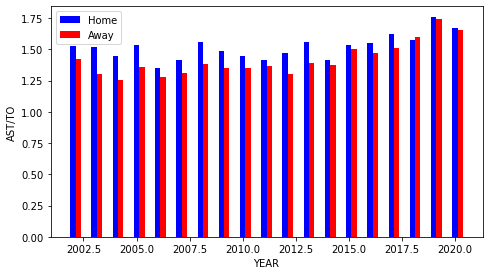

In [73]:
# plot the average AST/TO of players for home and away games
plt_home_away_features_by_year(master_home, master_away, 'AST/TO')

Observation:
1. every year with the exception of 2018 has higher average AST/TO per player in home games than away games.
2. The difference seems more pronounced in earlier years. Now, the difference is substantially less.

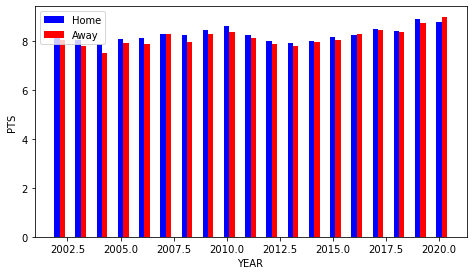

In [74]:
# plot the average points scored by a player for home and away games
plt_home_away_features_by_year(master_home, master_away, 'PTS')

Observation : 

Every year with the exception of 2020(away higher) and 2017(equal) has higher average points per player in home games than away games. 

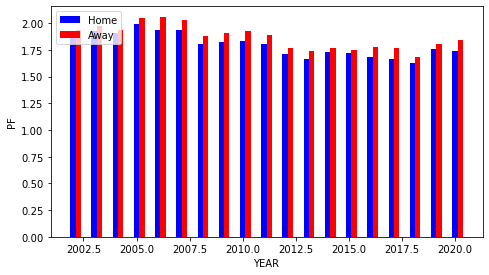

In [75]:
# plot the average fouls conceded by a player for home and away games
plt_home_away_features_by_year(master_home, master_away, 'PF')

Observation : 
    
Wow. Every single season, on average the away team player concedes more fouls per game than home team players. This could have 2 possible inferences:
1. The away players are nervous/get frustrated leading to more fouls committed.
2. The referees decision is biased and the home team generally gets the favour of a decision. (We will look into this later).

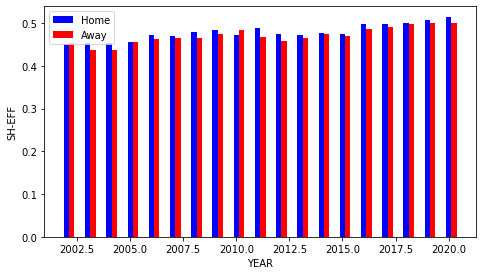

In [76]:
# plot the average fouls conceded by a player for home and away games
plt_home_away_features_by_year(shots_home, shots_away, 'SH-EFF')

Observation : 

In every year apart from 2002(away more), 2010(away more) and 2005(equal) the home team players had higher shooting efficiency than away team players on average. This could mean that away players were nervous/intimidated OR it could be purely by random chance. This also implies that the home team got more free throws on average.

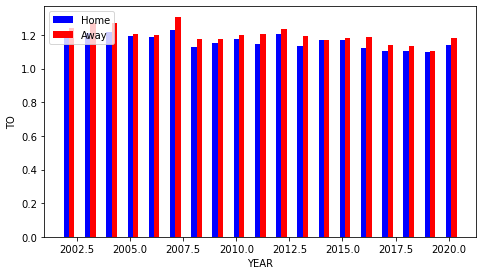

In [77]:
# As mentioned earlier, TO (Turnover) refers to the number of times the player gave away possession of the ball.
# plot the average turnover per player in home/away games.
plt_home_away_features_by_year(master_home, master_away, 'TO')

Observation :

In every year apart from 2014(same), the away team players gave away the ball more on average than home team players. 

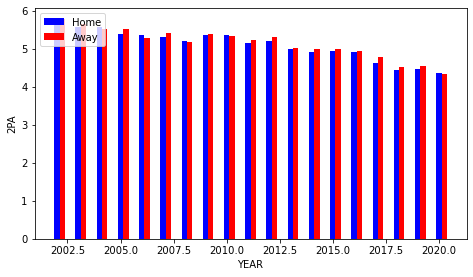

In [83]:
# As mentioned earlier, TO (Turnover) refers to the number of times the player gave away possession of the ball.
# plot the average turnover per player in home/away games.
plt_home_away_features_by_year(shots_home, shots_away, '2PA')